In [198]:
import subprocess 
import numpy as np
import correlation_functions
import matplotlib.pyplot as plt
import os
from time import sleep
from tqdm import tqdm

output_folder = "/Users/salvatoreprioli/Documents/MM837/tutorials_assignments/wk46/output_cache/"

In [247]:
#compile programs
process = subprocess.run('g++ -std=c++11 -O3 ising_metro.cc -o ising_metro.out', shell=True)
process = subprocess.run('g++ -std=c++11 -O3 ising_gibbs.cc -o ising_gibbs.out', shell=True)

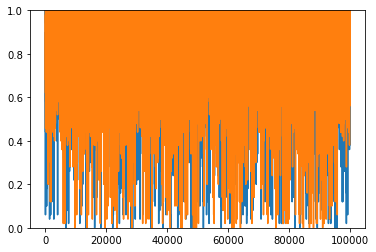

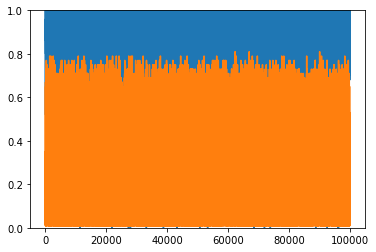

In [252]:
L = 10

beta = 0.48
thermalization = 0
steps = 100000
measure_every = 1
Type = "cold" 
Update = "typewriter"
distance = 1

outfile_ising_metro = output_folder + 'ising_metro_output'
subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
plt.plot(ising_metro, label = "Metropolis")

Type = "hot" 

outfile_ising_metro = output_folder + 'ising_metro_output'
subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
plt.plot(ising_metro, label = "Metropolis")

plt.ylim(0,1)
# plt.xlim(0,1000)
plt.show()
plt.close()

Type = "cold" 

outfile_ising_gibbs = output_folder + 'ising_gibbs_output'
subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update +  ' >' +  outfile_ising_gibbs, shell=True)
ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
plt.plot(ising_gibbs, label = "gibbs")

Type = "hot" 

outfile_ising_gibbs = output_folder + 'ising_gibbs_output'
subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update +  ' >' +  outfile_ising_gibbs, shell=True)
ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
plt.plot(ising_gibbs, label = "gibbs")

plt.ylim(0,1)
# plt.xlim(0,1000)
plt.show()
plt.close()



In [147]:
#type writer update starting from a hot condition

L = 10
beta = 0.001
thermalization = 1000
steps = 100000
measure_every = 100
Type = "cold" 
Update = "typewriter"
distance = 1

outfile_ising_metro = output_folder + 'ising_metro_output'
outfile_ising_gibbs = output_folder + 'ising_gibbs_output'
subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' >' +  outfile_ising_gibbs, shell=True)

ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[0]
ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)

correlation_metro = [correlation_functions.Correlation(ising_metro, ising_metro, offset=i) for i in range(0, 100)]
correlation_gibbs = [correlation_functions.Correlation(ising_gibbs, ising_gibbs, offset=i) for i in range(0, 100)]

autocorrelationTime_metro = []
for tau in tqdm(range(1, 100)):
    temp_metro = 1/2
    for i in range(1,tau):
        temp_metro += correlation_functions.Correlation(ising_metro, ising_metro, offset=i)
    autocorrelationTime_metro.append(temp_metro)

autocorrelationTime_gibbs = []
for tau in tqdm(range(1, 100)):
    temp_gibbs = 1/2
    for i in range(1,tau):
        temp_gibbs += correlation_functions.Correlation(ising_gibbs, ising_gibbs, offset=i)
    autocorrelationTime_gibbs.append(temp_gibbs)

fig, ax = plt.subplots(1,3, figsize=(25, 5), tight_layout=True)


ax[0].plot(ising_gibbs, label = "Gibbs")
# ## add error estimate
ax[0].set_ylim(-0.5,1)
ax[1].set_ylim(-0.5,1)

ax[0].set_ylabel('Average magnetization')
ax[1].set_ylabel('Autocorrelation')
ax[2].set_ylabel('Integrated Autocorrelation Time')

ax[1].plot(correlation_metro, label = "Metropolis")
ax[1].plot(correlation_gibbs, label = "Gibbs")
ax[2].plot(autocorrelationTime_metro, label = "Metropolis")
ax[2].plot(autocorrelationTime_gibbs, label = "Gibbs")
# ax[2].set_ylim(-0.5,3.5)

for axs in ax:
    axs.axhline(y=0, color='black')
    axs.legend()
ax[0].set_xlabel('Sweep Number')
ax[1].set_xlabel('Time')
ax[2].set_xlabel('Time')


KeyboardInterrupt: 

100%|██████████| 70/70 [01:21<00:00,  1.16s/it]


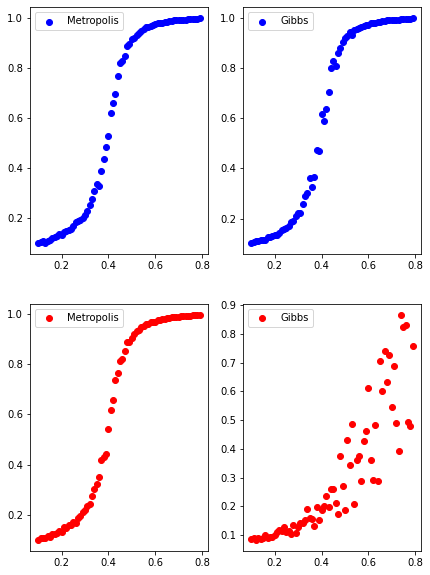

In [245]:
##get beta of transition
L = 10
thermalization = 0
steps = 1000
measure_every = 1
Update = "typewriter"
distance = 1

max_beta = 80
min_beta = 10
beta_list = []
average_magnetization_list_metro_cold = []
average_magnetization_list_gibbs_cold = []
average_magnetization_list_metro_hot = []
average_magnetization_list_gibbs_hot = []

for i in tqdm(range(min_beta, max_beta,1)):
    sleep(1)
    beta = i/100
    outfile_ising_gibbs = output_folder + 'ising_gibbs_output'+str(i)
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(i)
    try:
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_metro)
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_gibbs)
    except(OSError):
        Type = "cold" 
        subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
        subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' >' +  outfile_ising_gibbs, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
    ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
    
    average_magnetization_list_metro_cold.append(np.average(ising_metro))
    average_magnetization_list_gibbs_cold.append(np.average(ising_gibbs))

    outfile_ising_gibbs = output_folder + 'ising_gibbs_output'+str(i)
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(i)
    try:
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_metro)
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_gibbs)
    except(OSError):
        Type = "hot" 
        subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
        subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' >' +  outfile_ising_gibbs, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
    ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
    
    average_magnetization_list_metro_hot.append(np.average(ising_metro))
    average_magnetization_list_gibbs_hot.append(np.average(ising_gibbs))
    beta_list.append(beta)


fig, ax = plt.subplots(2,2, figsize=(7,10))
ax[0,0].scatter(beta_list, average_magnetization_list_metro_cold, label = 'Metropolis', color = 'blue')
ax[0,0].legend()
ax[0,1].scatter(beta_list, average_magnetization_list_gibbs_cold, label = 'Gibbs' , color = 'blue')
ax[0,1].legend()
ax[1,0].scatter(beta_list, average_magnetization_list_metro_hot,  label = 'Metropolis' , color = 'r')
ax[1,0].legend()
ax[1,1].scatter(beta_list, average_magnetization_list_gibbs_hot,  label = 'Gibbs' , color = 'r')
ax[1,1].legend()


100%|██████████| 70/70 [01:17<00:00,  1.11s/it]


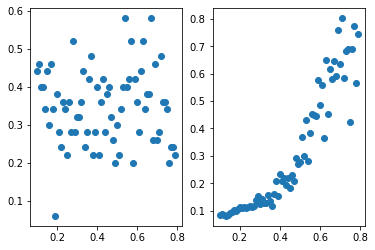

In [246]:
##get beta of transition
L = 10
thermalization = 0
steps = 1000
measure_every = 1
Type = "hot" 
Update = "typewriter"
distance = 1

max_beta = 80
min_beta = 10
beta_list = []
average_magnetization_list_metro = []
average_magnetization_list_gibbs = []
for i in tqdm(range(min_beta, max_beta,1)):
    sleep(1)
    beta = i/100
    outfile_ising_gibbs = output_folder + 'ising_gibbs_output'+str(i)
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(i)
    try:
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_metro)
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_gibbs)
    except(OSError):
        subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
        subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' >' +  outfile_ising_gibbs, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[0]
    ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
    
    average_magnetization_list_metro.append(np.average(ising_metro))
    average_magnetization_list_gibbs.append(np.average(ising_gibbs))
    beta_list.append(beta)


fig, ax = plt.subplots(1,2)
ax[0].scatter(beta_list, average_magnetization_list_metro)
ax[1].scatter(beta_list, average_magnetization_list_gibbs)

100%|██████████| 48/48 [01:12<00:00,  1.52s/it]


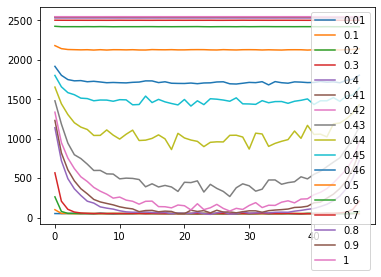

In [37]:
##get corr distance
L = 50
thermalization = 1000
steps = 10000
measure_every = 1
Type = "cold" 
Update = "typewriter"
beta = 0.01

distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.1
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))
beta = 0.2
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.3
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.4
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.41
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.42
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.43
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.44
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.45
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.46
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.5
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.6
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.7
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.8
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 0.9
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))

beta = 1
distance_corr = []
for distance in tqdm(range(1, L-1)):
    outfile_ising_metro = output_folder + 'ising_metro_output'+str(distance)
    subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' ' + Type + ' ' + Update + ' ' + str(distance) + ' >' +  outfile_ising_metro, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)[1]
    average_gcorr = np.average(ising_metro)
    distance_corr.append(average_gcorr)
plt.plot(distance_corr, label=str(beta))
plt.legend()
